# Random Forest Implementation

In [37]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Recopila data de los csv
def get_data(no_plagio, plagio):
    data1 = pd.read_csv(plagio)
    data2 = pd.read_csv(no_plagio)
    data = pd.concat([data1, data2], ignore_index=True)
    return data

In [39]:
# Devuelve los codigos
def get_features(data):
    features = data[['code_java_1', 'code_java_2']]
    return features

In [40]:
# Devuelve los labels (Plagio = 1, No Plagio = 0)
def get_labels(data):
    labels = data[['label']]
    return labels

In [41]:
# Convierte los codigos en secuencias de enteros para que puedan ser procesados
def tokenizar(features_train, features_test):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(features_train['code_java_1'] + features_train['code_java_2'])
    features_train_sequences_code1 = tokenizer.texts_to_sequences(features_train['code_java_1'])
    features_train_sequences_code2 = tokenizer.texts_to_sequences(features_train['code_java_2'])
    features_test_sequences_code1 = tokenizer.texts_to_sequences(features_test['code_java_1'])
    features_test_sequences_code2 = tokenizer.texts_to_sequences(features_test['code_java_2'])
    return features_train_sequences_code1, features_train_sequences_code2, features_test_sequences_code1, features_test_sequences_code2

## Preprocesado
 Para que el modelo funcione correctamente debe recibir el mismo input_shape de los codigos de Java. Es por ello que se les aplica un padding para normalizar las secuencias.

In [42]:
# Asegurarse de que todas las secuencias tengan la misma longitud
def padding(train_f1, train_f2, test_f1, test_f2):
    max_train_f1 = max(len(seq) for seq in train_f1) 
    max_train_f2 = max(len(seq) for seq in train_f2)
    max_test_f1 = max(len(seq) for seq in test_f1)
    max_test_f2 = max(len(seq) for seq in test_f2)
    max_length = max(max_train_f1, max_train_f2, max_test_f1, max_test_f2)

    features_train_sequences_code1 = pad_sequences(
        train_f1,
        maxlen = max_length
    )

    features_train_sequences_code2 = pad_sequences(
        train_f2,
        maxlen = max_length
    )

    features_test_sequences_code1 = pad_sequences(
        test_f1,
        maxlen = max_length
    )

    features_test_sequences_code2 = pad_sequences(
        test_f2,
        maxlen = max_length
    )
    print(max_length)

    return features_train_sequences_code1, features_train_sequences_code2, features_test_sequences_code1, features_test_sequences_code2

In [43]:
data = get_data(
    'non_plagiarized_java_pairs/non_plagiarized_java_pairs.csv', 'plagiarized_java_pairs.csv'
    )
features = get_features(data)
labels = get_labels(data)

In [44]:
# Split de Train y Test
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [45]:
path1 = 'test.java'
path2 = 'test copy.java'

# Cargar los codigos
code1 = open(path1, 'r').read()
code2 = open(path2, 'r').read()

# Crear un dataframe con los codigos
codigos = pd.DataFrame({'code_java_1': [code1], 'code_java_2': [code2]})


In [46]:
codigos

code_java_1  \
0  public class Fibonacci {\n    public static vo...   

                                         code_java_2  
0  public class Fibonacci {\n    public static vo...

In [47]:
features_test

code_java_1  \
14763  import java.io.*;\nimport java.util.*;\nimport...   
46826  import java.util.*;\nimport java.io.*;\nimport...   
8869   import java.io.*;\nimport java.util.*;\nimport...   
25266  import java.io.*;\nimport java.net.*;\nimport ...   
2059   \n\n\n\nimport java.io.*;\nimport java.*;\nimp...   
...                                                  ...   
33081  import java.io.*;\nimport java.net.*;\nimport ...   
12957  \nimport java.net.*;\nimport java.io.*;\nimpor...   
107    \n\n\n\nimport java.io.*;\n\n\n\n\n\nclass Bru...   
43916  import java.io.*;\nimport java.net.*;\nimport ...   
11029  import java.net.*;\nimport java.io.*;\nimport ...   

                                             code_java_2  
14763  \nimport java.net.*;\nimport java.io.*;\n\n\np...  
46826  import java.io.*;\nimport java.net.*;\n\n\n\n\...  
8869   \n\n\n\n\n\nimport java.util.*;\nimport java.i...  
25266  \t\n\n\nimport java.io.*;\nimport java.net.*;\...  
2059   \nimport java.io.*;\nimport java.util.*;\n\npu...  
...                                                  ...  
33081  \npackage java.httputils;\n\nimport java.net.U...  
12957  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...  
107    \n\n\n\nimport java.util.*;\nimport java.net.*...  
43916  \nimport java.util.*;\nimport java.io.*;\nimpo...  
11029  \n\n\nimport java.*;\nimport java.io.*;\n\npub...  

[9432 rows x 2 columns]

In [48]:
import pandas as pd

# Suponiendo que df1 es tu primer dataframe con 9432 filas
# y df2 es tu segundo dataframe con 1 fila

# Utiliza concat para agregar df2 a df1
features_test = pd.concat([features_test, codigos], ignore_index=True)

# Verifica el resultado
features_test.count()


code_java_1    9433
code_java_2    9433
dtype: int64

In [49]:
features_test

code_java_1  \
0     import java.io.*;\nimport java.util.*;\nimport...   
1     import java.util.*;\nimport java.io.*;\nimport...   
2     import java.io.*;\nimport java.util.*;\nimport...   
3     import java.io.*;\nimport java.net.*;\nimport ...   
4     \n\n\n\nimport java.io.*;\nimport java.*;\nimp...   
...                                                 ...   
9428  \nimport java.net.*;\nimport java.io.*;\nimpor...   
9429  \n\n\n\nimport java.io.*;\n\n\n\n\n\nclass Bru...   
9430  import java.io.*;\nimport java.net.*;\nimport ...   
9431  import java.net.*;\nimport java.io.*;\nimport ...   
9432  public class Fibonacci {\n    public static vo...   

                                            code_java_2  
0     \nimport java.net.*;\nimport java.io.*;\n\n\np...  
1     import java.io.*;\nimport java.net.*;\n\n\n\n\...  
2     \n\n\n\n\n\nimport java.util.*;\nimport java.i...  
3     \t\n\n\nimport java.io.*;\nimport java.net.*;\...  
4     \nimport java.io.*;\nimport java.util.*;\n\npu...  
...                                                 ...  
9428  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...  
9429  \n\n\n\nimport java.util.*;\nimport java.net.*...  
9430  \nimport java.util.*;\nimport java.io.*;\nimpo...  
9431  \n\n\nimport java.*;\nimport java.io.*;\n\npub...  
9432  public class Fibonacci {\n    public static vo...  

[9433 rows x 2 columns]

In [50]:
# Codigos en secuencias de enteros
features_train_sequences_code1, features_train_sequences_code2, features_test_sequences_code1, features_test_sequences_code2 = tokenizar(
    features_train, 
    features_test
)

In [51]:
# Todas las secuencias tengan la misma longitud
features_train_code1, features_train_code2, features_test_code1, features_test_code2 = padding(
    features_train_sequences_code1,
    features_train_sequences_code2,
    features_test_sequences_code1,
    features_test_sequences_code2
)

5199


In [52]:
clasificador = RandomForestClassifier()

In [53]:
features_train_concatenated = np.concatenate(
    (
        features_train_code1,
        features_train_code2
    ), 
    axis = 1
)

clasificador.fit(features_train_concatenated, labels_train)

c:\Users\Ricardo Caceres\.virtualenvs\NutryPlus-EF-keS824Fg\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [54]:
features_test_concatenated = np.concatenate(
    (
        features_test_code1,
        features_test_code2
    ), 
    axis = 1
)

labels_prediction = clasificador.predict(features_test_concatenated)

In [55]:
labels_prediction_added = labels_prediction
labels_prediction = labels_prediction[:-1] 

In [56]:
last_element = labels_prediction_added[-1]

In [57]:
last_element

0

Confusion Matrix:
 [[9421    0]
 [   7    4]]


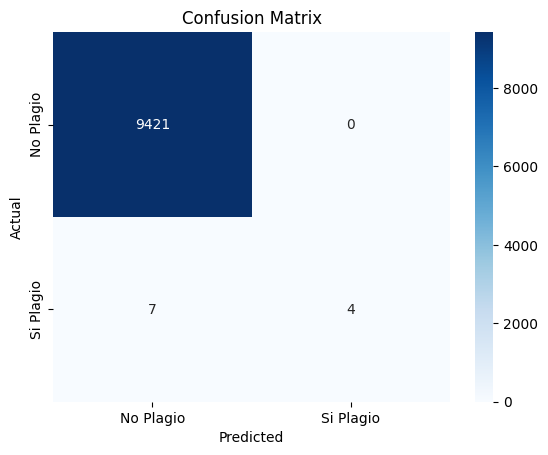

In [58]:
cm = confusion_matrix(labels_test, labels_prediction)
print('Confusion Matrix:\n', cm)

# Assuming cm is the confusion matrix
labels = ['No Plagio', 'Si Plagio']  # Replace with your class labels

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)

# Show the plot
plt.show()

In [59]:
# Calculate the accuracy
accuracy = accuracy_score(labels_test, labels_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.9992578456318915


In [60]:
cr = classification_report(labels_test, labels_prediction)
print('Classification Report:\n', cr)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9421
           1       1.00      0.36      0.53        11

    accuracy                           1.00      9432
   macro avg       1.00      0.68      0.77      9432
weighted avg       1.00      1.00      1.00      9432



In [ ]:
import joblib

# Save the model
joblib.dump(clasificador, 'random_forest_model.pkl')